# Exploratory Data Analysis

### Source
- https://archive.ics.uci.edu/ml/datasets/Forest+Fires

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('lake/forest_fires/forestfires.csv', dtype = {'X': str, 'Y': str})
print(df.shape)
df.head()

(517, 13)


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [3]:
df.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

In [4]:
categorical_cols = ['X', 'Y', 'month', 'day']
df[categorical_cols].describe()

,X,Y,month,day
count,517,517,517,517
unique,9,7,12,7
top,4,4,aug,sun
freq,91,203,184,95


In [5]:
numerical_cols = [col for col in df.columns.tolist() if not col in categorical_cols]
df[numerical_cols].describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


### Exploring

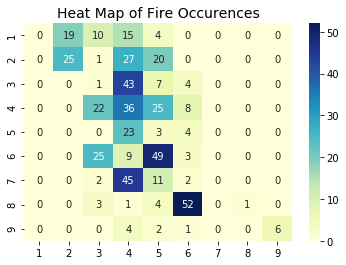

In [6]:
position = df.groupby(['X', 'Y']).count()['month'].unstack().fillna(0)
position.index.name = None
position.columns.name = None
position = pd.concat([position, pd.DataFrame({'1': np.zeros(9), '7':np.zeros(9)},index=position.index)],  axis = 1)
position = position.reindex(sorted(position.columns), axis=1).astype(int)
ax = sns.heatmap(position, annot=True, cmap="YlGnBu")
ax.set_title('Heat Map of Fire Occurences', fontsize='14');

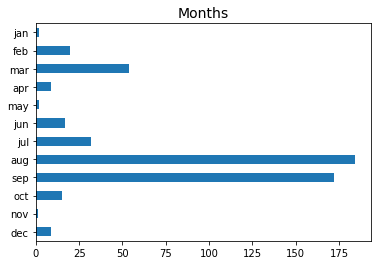

In [7]:
# fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
df['month'] = pd.Categorical(df['month'], ["jan", "feb", "mar", "apr", "may", "jun",
                                           "jul", "aug", "sep", "oct", "nov", "dec"])
ax = df.month.value_counts(sort=False).sort_index(ascending=False).plot.barh()
ax.set_title("Months", fontsize=14);

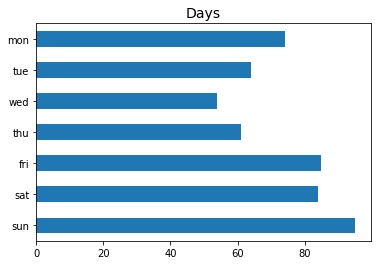

In [8]:
df['day'] = pd.Categorical(df['day'], ["mon", "tue", "wed", "thu", "fri", "sat", "sun"])
ax = df.day.value_counts(sort=False).sort_index(ascending=False).plot.barh()
ax.set_title("Days", fontsize=14);

### Forest Weather Index (FWI)
Is a Canadian system for rating fire danter. It includes six components (Cortez et al).
- Fine Fuel Moisture Code (FFMC): moisture content surface litter and influences ignition and fire spread
- Initial Spread Index (ISI): Fire velocity spread
- Duff Moisture Code (DMC): moisture content of shallow organic layers
- Drought Code (DC): moisture content of deep organic layers

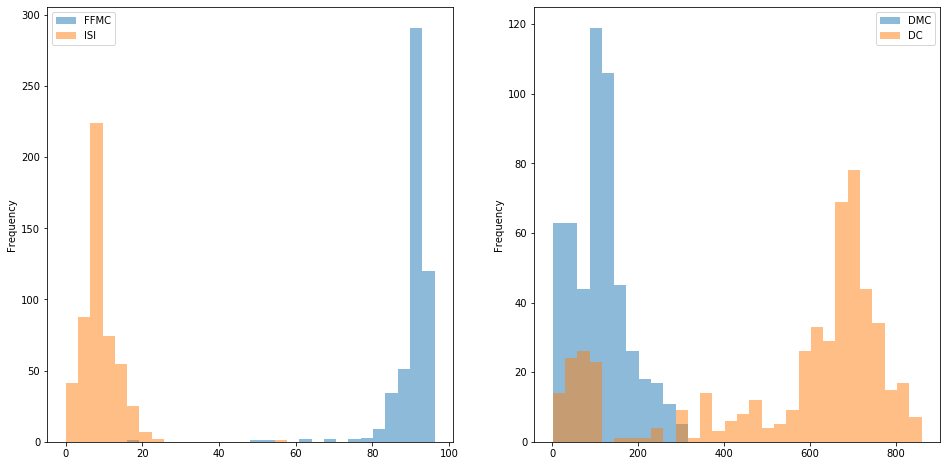

In [9]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))
df[['FFMC', 'ISI']].plot.hist(ax=ax1, bins=30, alpha=0.5)
df[['DMC', 'DC']].plot.hist(ax=ax2, bins=30, alpha=0.5);

### Weather Indicators
- temp: Temperature (Celcius)
- RH: Relative humidity (%)
- wind (km/h)
- rain (mm/m2)

In [10]:
# Remove Rain Outliers
sorted_rain = df.rain.sort_values(ascending=False)
print(sorted_rain.head(10))
print(sorted_rain.tail(5))
df = df[df.rain < 6.0]

499    6.4
509    1.4
243    1.0
500    0.8
501    0.8
502    0.4
286    0.2
3      0.2
516    0.0
172    0.0
Name: rain, dtype: float64
346    0.0
347    0.0
348    0.0
349    0.0
0      0.0
Name: rain, dtype: float64


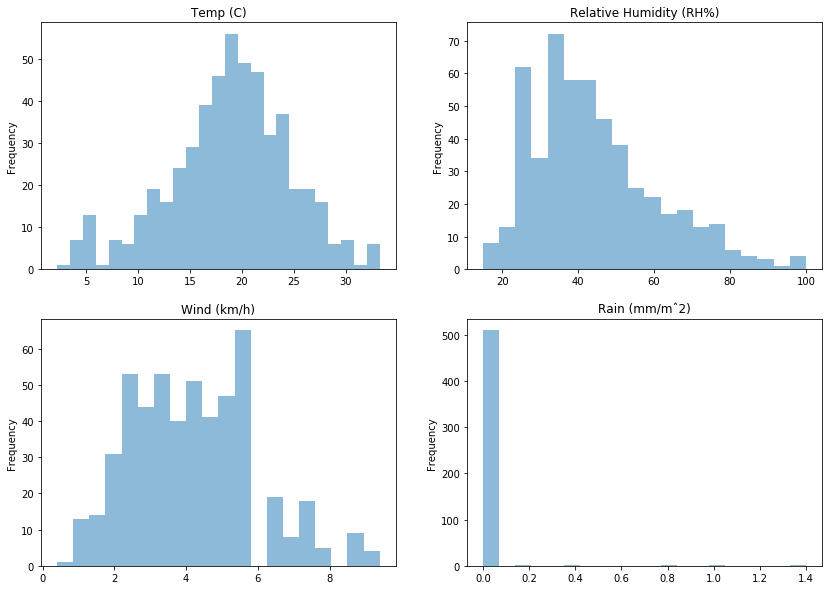

In [11]:
fig, axes = plt.subplots(2,2, figsize=(14,10))
df['temp'].plot.hist(ax=axes[0,0], bins=25, alpha=0.5, title='Temp (C)')
df['RH'].plot.hist(ax=axes[0,1], bins=20, alpha=0.5, title='Relative Humidity (RH%)')
df['wind'].plot.hist(ax=axes[1,0], bins=20, alpha=0.5, title='Wind (km/h)');
df['rain'].plot.hist(ax=axes[1,1], bins=20, alpha=0.5, title='Rain (mm/mˆ2)');

### Target: Burnt Area

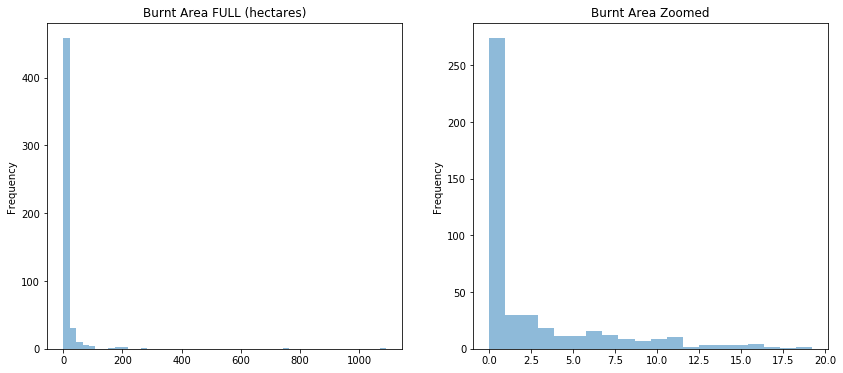

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6))
df.area.plot.hist(ax = ax1, bins=50, alpha=0.5, title="Burnt Area FULL (hectares)");
df[df.area < 20].area.plot.hist(ax = ax2, bins=20, alpha=0.5, title="Burnt Area Zoomed");

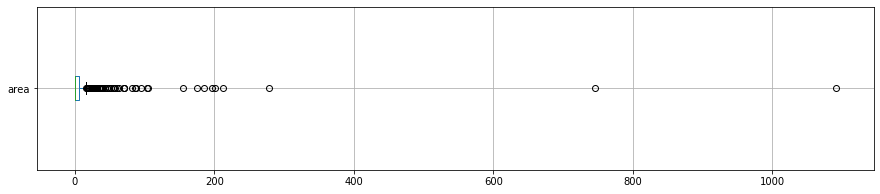

In [13]:
df.boxplot('area', vert=False, figsize=(15,3))

### Correlation Analysis

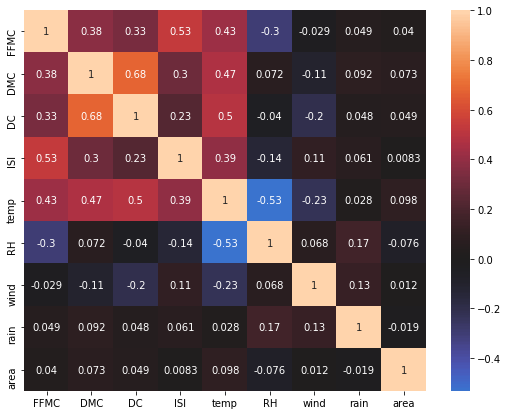

In [14]:
fig, ax = plt.subplots(figsize=(9,7))
sns.heatmap(df.corr(), annot=True, ax=ax, center=0);

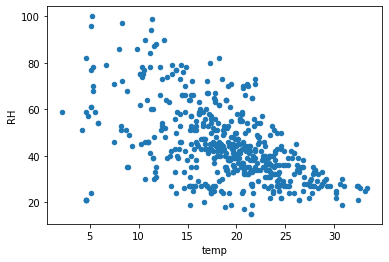

In [15]:
df.plot.scatter(x='temp', y='RH');

### Modelling

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
pd.options.display.float_format = "{:,.2f}".format

In [17]:
features = ["FFMC","DMC","DC","ISI","temp","RH","wind","rain"]
X = df[features]
y = df.area
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=25)
print(X_train.shape, X_test.shape)
print(y_test.shape, y_test.shape)

(387, 8) (129, 8)
(129,) (129,)


In [18]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(model.coef_)
y_pred[:10]

[ 4.04754064e-02  8.80912348e-02 -5.76712826e-03 -5.99483462e-01
  9.95793412e-01 -2.56471420e-01  2.70507552e+00 -1.75399229e+01]


array([ 23.2230228 ,   1.77796338,  17.05878998,   4.977692  ,
        19.92594845, -13.19629631,  -5.92050314,  19.78186669,
        -7.94545511,  29.94866545])

In [19]:
pd.DataFrame({'Actuals': y_test, 'Predictions': y_pred})

,Actuals,Predictions
416,7.02,23.22
242,10.13,1.78
307,5.18,17.06
224,37.71,4.98
440,0.00,19.93
...,...,...
97,0.00,17.37
356,1.26,16.48
73,0.00,15.10
376,0.00,15.38


(MAE) Mean absolute error: 20.48
(MSE) Mean squared error: 1761.87
(R2) Coefficient of determination: -0.02


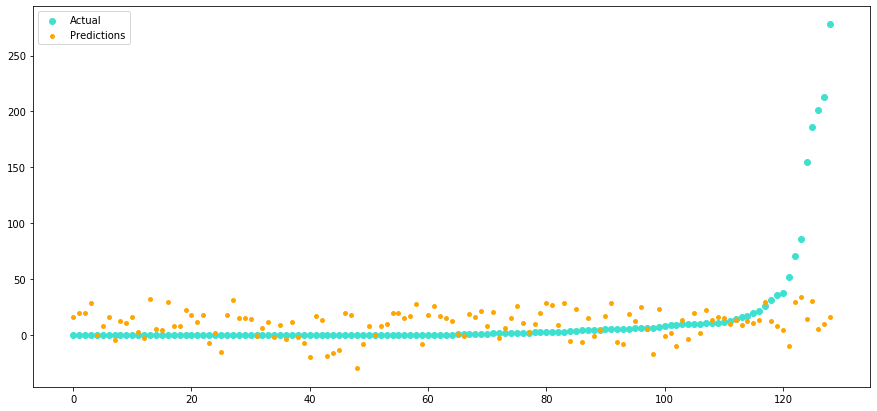

In [20]:
def evaluate(y_test, y_pred):
    print('(MAE) Mean absolute error: %.2f' % mean_absolute_error(y_test, y_pred))
    print('(MSE) Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
    print('(R2) Coefficient of determination: %.2f' % r2_score(y_test, y_pred))
    x_ticks = range(y_test.shape[0])
    fig, ax = plt.subplots(figsize=(15,5))
    a = np.concatenate((y_test.values.reshape(-1,1), y_pred.reshape(-1,1)), axis=1)
    a = a[a[:,0].argsort()]
    ax.scatter(x_ticks, a[:,0], label='Actual', c='turquoise')
    ax.scatter(x_ticks, a[:,1], label='Predictions', s=15, c='orange');
    ax.legend()
evaluate(y_test, y_pred)

### SVR

In [21]:
from sklearn.preprocessing import StandardScaler
xscaler = StandardScaler(); x_test_scaler = StandardScaler()
yscaler = StandardScaler(); y_test_scaler = StandardScaler()
X_train_sc = xscaler.fit_transform(X_train)
y_train_sc = yscaler.fit_transform(y_train.values.reshape(-1,1))
X_test_sc = x_test_scaler.fit_transform(X_test)
y_test_sc = y_test_scaler.fit_transform(y_test.values.reshape(-1,1))

In [22]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(X_train_sc, y_train_sc.ravel())

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [23]:
y_preds_sc = svr.predict(X_test_sc)
y_preds = y_test_scaler.inverse_transform(y_preds_sc)
y_preds

array([ 9.52140001,  9.31413734,  9.64592322,  9.75556004,  8.76651019,
        9.25965614,  9.3021641 ,  9.33244425,  8.94846895,  9.58076526,
        9.95558717,  9.2088044 ,  9.62773399, 10.07352383,  9.5477286 ,
        8.96716336,  9.64855534,  9.2810512 , 10.19142392, 11.83169572,
        9.7013417 , 10.92659543,  9.54155786, 20.47501072,  9.7801969 ,
       10.18867785,  9.73387111,  9.73552469,  9.9761062 ,  9.62976381,
        8.86206436,  9.74708921,  9.48536482, 10.09230382,  9.39166648,
        9.31835287,  8.89677352,  9.72631209,  7.57616626,  8.1111278 ,
        9.52707308, 12.71728841,  9.10328323,  9.75033328, 10.59145604,
        9.88163054,  9.26015302,  8.08189927, 10.69988725, 10.07342553,
        9.47891607,  9.85346893,  9.73129632,  8.78897631,  8.667235  ,
        8.40547678,  9.04804316, 10.14670811, 10.06087128,  9.06074276,
        9.59779252,  9.57521023,  9.47181713,  9.81368553,  9.43513535,
       10.8379944 ,  9.81234659,  9.67973399,  9.39687773, 11.77

(MAE) Mean absolute error: 16.79
(MSE) Mean squared error: 1741.79
(R2) Coefficient of determination: -0.01


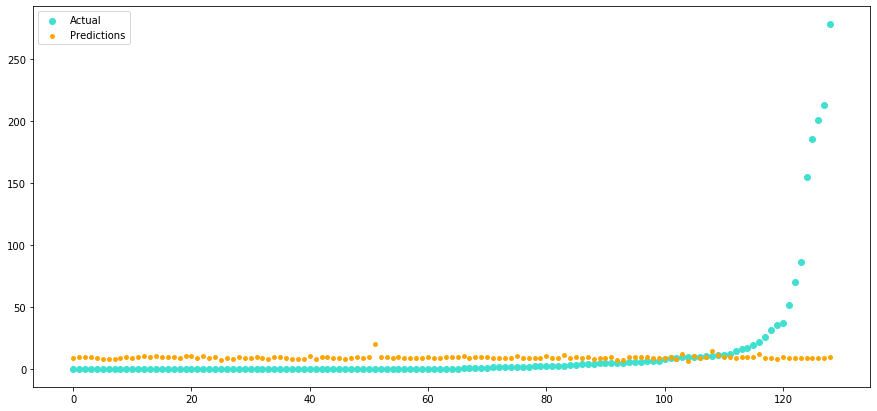

In [24]:
evaluate(y_test, y_preds)